In [1]:
import scanpy as sc
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.simplefilter(action='ignore', category=UserWarning)

In [2]:
def create_output_folder(folder_path):
    if not os.path.exists(folder_path):
        os.makedirs(folder_path, exist_ok=True)
        print(f"Folder created: {folder_path}")
    else:
        print(f"Folder already exists: {folder_path}")

objects_folder = "./output"
create_output_folder(objects_folder)


Folder already exists: ./output


In [3]:
# to ensure that text in plt images opens as text box rather than glyphs in adobe
plt.rcParams['pdf.fonttype'] = 42  
plt.rcParams['ps.fonttype'] = 42   

In [4]:
adata= sc.read_h5ad("./output/data_objects/NucSeq_integrated_v1_annotated_oldTransfer.h5ad")

In [5]:
adata.obs["celltype_l1"].value_counts()

celltype_l1
TAL               55928
PT                37950
PC                 9619
EC                 6787
DTL                5189
IC                 4678
CNT                3688
DCT                2931
PEC                2588
podocyte           2520
FIB                2002
VSM/P               467
MDC                 463
T                   415
PL                  279
mesangial cell      255
MAC                 241
ATL                 111
Mono                 77
NKC/T                65
B                    39
cycMNP               32
N                    22
MAST                 12
cDC                   7
NEU                   5
cycNKC/T              4
pDC                   2
Name: count, dtype: int64

In [6]:
sample_rename_map = {
    "nP103K": "P01",
    "nP108K": "P02",
    "nP126K": "P03",
    "nP137K": "P04",
    "nP139K": "P05",
    "nP143K": "P06",
    "nP072K": "P07",
    "nP073K": "P08",
    "nP105K": "P09",
    "nP140K": "P10",
    "nP144K": "P11",
    "nCN017K": "C02",
    "nCN029K": "C01",
    "nCN021K": "C03",
    "nC018K": "C04",
    }

adata.obs["sample_ids"] = adata.obs["sample"].map(sample_rename_map)
sample_order = [
    "P01",
    "P02",
    "P03",
    "P04",
    "P05",
    "P06",
    "P07",
    "P08",
    "P09",
    "P10",
    "P11",
    "C01",
    "C02",
    "C03",
    "C04"
]

adata.obs["sample_ids"] = pd.Categorical(
    adata.obs["sample_ids"],  
    categories=sample_order,
    ordered=True
)

In [7]:
adata.obs.celltype_l1.replace({"endothelial cell": "EC",
                                "parietal epithelial cell": "PEC",
                               "MAC-M2" : "MAC",
                               'mesangial cell':'MC',
                               'podocyte': 'POD',
                               #"PL" : "unknown",
                               
                              }, inplace=True)

In [8]:
#Metrics
num_nuclei = adata.n_obs
median_genes = adata.obs["n_genes_by_counts"].median()
median_transcripts = adata.obs["total_counts"].median()

print(f'number of nuclei:',num_nuclei)
print(f'median number of genes:',median_genes)
print(f'median number of transcripts:',median_transcripts)


number of nuclei: 136376
median number of genes: 932.0
median number of transcripts: 1234.0


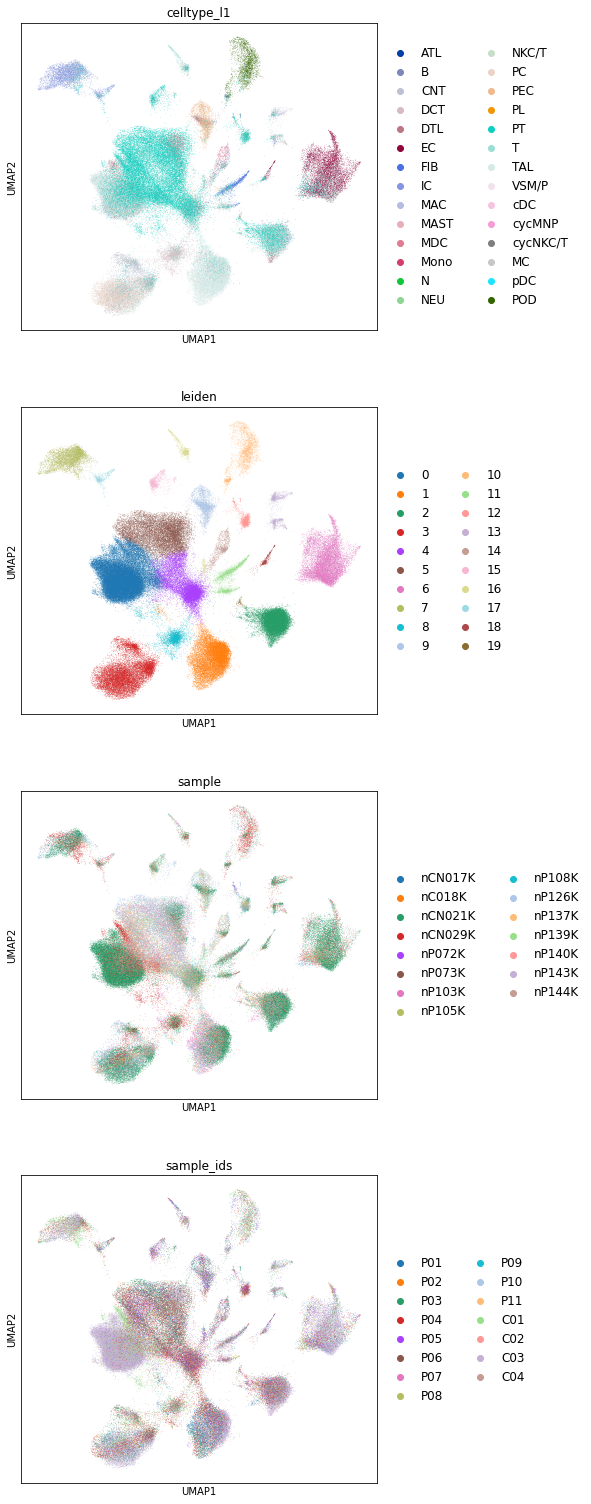

In [9]:
plt.rcParams["figure.figsize"] = (6, 6) 

sc.pl.umap(
    adata,
    color=['celltype_l1', 'leiden', 'sample', 'sample_ids'],
    ncols=1, 
    legend_fontsize=12,
    legend_fontoutline=2
)


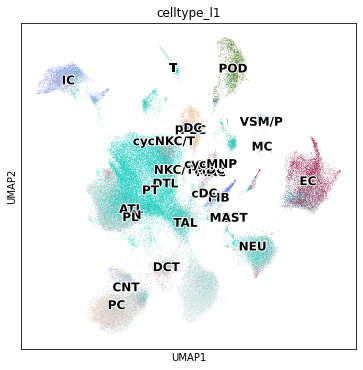

In [10]:
plt.rcParams["figure.figsize"] = (6, 6) 

sc.pl.umap(
    adata,
    color=['celltype_l1'],
    legend_loc='on data',
    legend_fontsize=12,
    legend_fontoutline=2
)


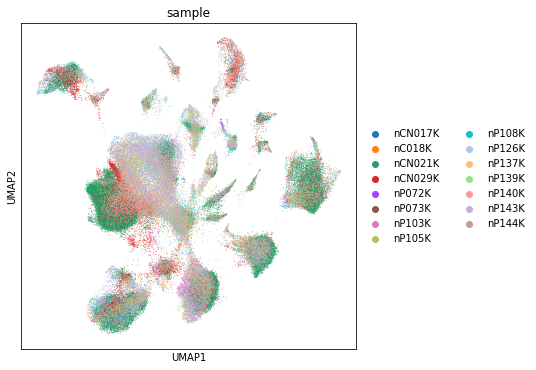

In [11]:
sc.pl.umap(
    adata,
    color= ["sample"],
    size=2,
)

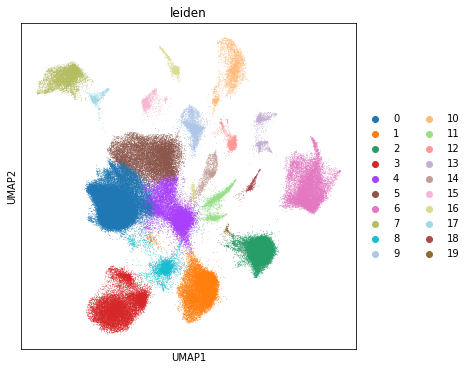

In [12]:
sc.pl.umap(
    adata,
    color= ["leiden"],
    size=2,
)


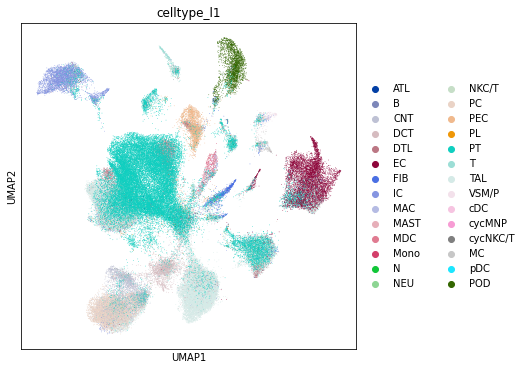

In [13]:
sc.pl.umap(
    adata,
    color= ["celltype_l1"],
    size=2,
)


In [14]:
Kidney_markers = {
    "Podocyte": ["PODXL", "NPHS2", "WT1"],
    "Parietal Epithelial Cell": ["CLDN1", "VCAM1", "CFH", "ALDH1A2"],
    "Fibroblast": ["COL1A1", "C7"],
    "Myofibroblast": ["PDGFRB", "ACTA2", "VIM", "FAP"],
    "Mesangial Cell": ["PDGFRB", "ITGA8", "ADAMTS5", "ROBO1"],
    "ReninJGC": ["REN", "ACTA2", "TAGLN"],
    "VSMC": ["ACTA2", "CNN1", "DES"],
    "Endothelial Cell": ["PECAM1", "CDH13", "EMCN", "PLVAP", "SLC14A1", "IL33"],
    "Lymphatic Cell": ["PDPN", "PROX1", "LYVE1"],
    "Proximal Tubule": ["SLC22A8", "SLC5A2", "SLC5A12"],
    "dLOH": ["AQP1", "TACSTD2", "KLRG2"],
    "aLOH": ["UMOD", "SLC12A1"],
    "DCT": ["SLC12A3"],
    "Connecting Tubule": ["CALB1", "SLC8A1"],
    "Principal Cell": ["AQP2", "GATA3"],
    "Intercalated Cell": ["SLC4A1", "SLC26A4", "ATP6V0D2"],
    "Neural": ["NRXN1"],
    "Proximal Tubule (Stress/Inflammed)": ["GPX3"],
    "Mitotic": ["MKI67", "STMN1", "TOP2A"]
}


## QC

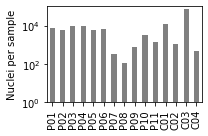

In [15]:
cell_counts = adata.obs['sample_ids'].value_counts()
cell_counts = cell_counts.reindex(sample_order, fill_value=0) 

plt.figure(figsize=(3, 2))  
cell_counts.plot(kind='bar', color='grey')

plt.title('')
plt.xlabel('')
plt.ylabel('Nuclei per sample')
plt.yscale('log') 
plt.ylim((1,100000))
plt.xticks(rotation=90)  
plt.tight_layout()
plt.savefig('./output/NucSeq_Nuclei_Numbers.pdf',dpi=600)
plt.show()

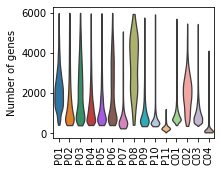

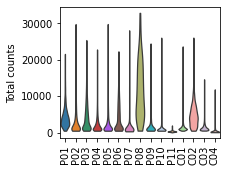

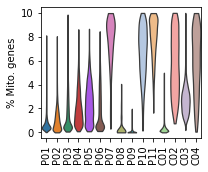

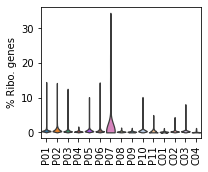

All violin plots saved.


In [16]:
import matplotlib.pyplot as plt
import scanpy as sc

# Directory to save files
output_dir = "./output/"

# Set global figure size
plt.rcParams["figure.figsize"] = (3.5, 2.5)

# Variables to plot
violin_vars = ["n_genes_by_counts", "total_counts", "pct_counts_mt", "pct_counts_ribo"]

# File names 
output_names = {
    "n_genes_by_counts": "NucSeq_n_genes_by_counts.pdf",
    "total_counts": "NucSeq_total_counts.pdf",
    "pct_counts_mt": "NucSeq_pct_counts_mt.pdf",
    "pct_counts_ribo": "NucSeq_pct_counts_ribo.pdf",
}

# Y-axis labels 
y_labels = {
    "n_genes_by_counts": "Number of genes",
    "total_counts": "Total counts",
    "pct_counts_mt": "% Mito. genes",
    "pct_counts_ribo": "% Ribo. genes",
}

# Loop over variables
for var in violin_vars:
    sc.pl.violin(
        adata,
        [var],
        groupby='sample_ids',
        rotation=90,
        stripplot=False,
        multi_panel=True,
        show=False  
    )
    
    plt.title('')
    plt.xlabel('')
    plt.ylabel(y_labels[var])  # Use custom y-axis label
    #plt.ylabel('Number of nuclei per sample')
    #plt.yscale('log')
    #plt.ylim((1, 100000))
    plt.xticks(rotation=90)
    plt.tight_layout()
    
    output_path = output_dir + output_names[var]
    plt.savefig(output_path, dpi=600, format='pdf')
    plt.show()  

    plt.close()  

print("All violin plots saved.")


In [17]:
cell_type_counts = adata.obs['celltype_l1'].value_counts()
cell_type_counts

celltype_l1
TAL         55928
PT          37950
PC           9619
EC           6787
DTL          5189
IC           4678
CNT          3688
DCT          2931
PEC          2588
POD          2520
FIB          2002
VSM/P         467
MDC           463
T             415
PL            279
MC            255
MAC           241
ATL           111
Mono           77
NKC/T          65
B              39
cycMNP         32
N              22
MAST           12
cDC             7
NEU             5
cycNKC/T        4
pDC             2
Name: count, dtype: int64

In [18]:
# Remove cell-type classes that low confidence in annotation
cell_types_to_remove = ['PL','MAST']
mask = ~adata.obs['celltype_l1'].isin(cell_types_to_remove)

adata = adata[mask].copy()



In [19]:
adata.layers["scaled"] = sc.pp.scale(adata, max_value=10, copy=True).X.copy()

In [20]:
markers = ["PODXL", "PDGFRB", "CLDN1", "PECAM1", "COL1A1", "LRP2", "VCAM1", "SLC12A3", "CALB1",
           "CASR", "SLC12A1", "UMOD",
           "SH3GL3", "BCAS1",
           "UNC5D","LRRC4C",
           "AQP2", "ATP6V0D2",
           "NRXN1",
           "PTPRC", #"MS4A2", 
           "S100A9", "CD163", "CD14", "FCGR3A", "ITGAX", "CLEC4C", # "CLEC9A", 
           "CD38",# "SDC1", 'CD19', "JCHAIN", 
           "MS4A1", "CD3D", "GZMA"] 

In [21]:
CTs = list(adata.obs.celltype_l1.unique())
CTs

['IC',
 'DTL',
 'POD',
 'CNT',
 'PT',
 'PC',
 'PEC',
 'T',
 'TAL',
 'DCT',
 'EC',
 'Mono',
 'B',
 'MC',
 'ATL',
 'NEU',
 'FIB',
 'cycNKC/T',
 'MDC',
 'cDC',
 'NKC/T',
 'VSM/P',
 'MAC',
 'N',
 'pDC',
 'cycMNP']

In [22]:
order_old = [ "POD", "MC", "PEC", "EC", "FIB", 'VSM/P', "PT", "DCT", "CNT", "TAL",   "ATL", "DTL", "PC", "IC",
     #'MAST',  
    'MAC', 'Mono', 'MDC','N', 'pDC', #'PL',
     'B', 'T',  
    'cycMNP', 'NKC/T']

order = ["POD", "MC", "PEC", "EC", "FIB", 'VSM/P', "PT", "DCT", "CNT", "TAL", "ATL", "DTL", "PC", "IC", \
         #"PapE", 
         'NEU',
        #'MAST', 
         'N', 'MAC', 'Mono',  'MDC','pDC', 
        #'PL', 
         'B',  'T', 
         'cDC', 'cycMNP',  'NKC/T', 'cycNKC/T' ]
         
adata.obs["celltype_l1"] = adata.obs["celltype_l1"].astype("category").cat.reorder_categories(order)

In [23]:
set(order)-set(CTs)


set()

In [24]:
order2 = ["POD", "MC", "PEC", "EC", "FIB", 'VSM/P', "PT", "DCT", "CNT", "TAL", "ATL", "DTL", "PC", "IC", \
         "PapE", 'NEU',
        'MAST', 'N', 'MAC', 'Mono',  'MDC','pDC', 
            'PL', 'B',  'T', 
         'cDC', 'cycMNP',  'NKC/T', 'cycNKC/T' ]
#adata_proc.obs["celltype_l1"] = adata_proc.obs["celltype_l1"].astype("category").cat.reorder_categories(order)
#adata.obs["celltype_l1"] = adata.obs["celltype_l1"].astype("category").cat.reorder_categories(order)

In [25]:
missed = set(CTs)-set(order)
missed

set()

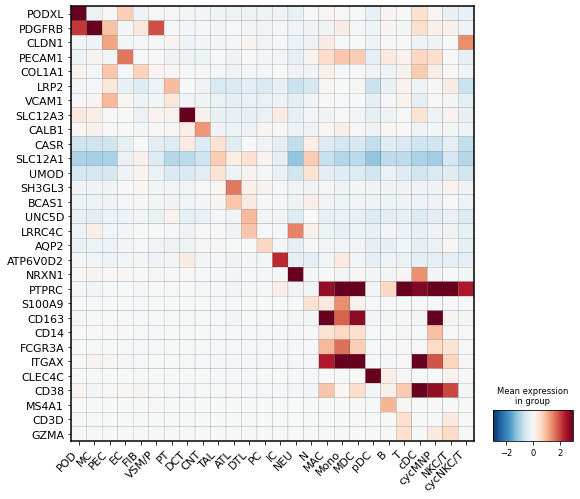

In [26]:
mp = sc.pl.matrixplot(
    adata,
    groupby="celltype_l1",
    var_names=markers,
    dendrogram=False,
    vmin=-3,
    cmap="RdBu_r",
    vmax=3,
    layer="scaled",
    swap_axes=True,  # to swap x and y axes
    return_fig=True,
    figsize=(9, 8),
)

mp.style(edge_color='black', cmap="RdBu_r").savefig("./output/matrixplot_markers_RdBu.png", bbox_inches="tight")

mp.ax_dict["mainplot_ax"].set_xticklabels(
    mp.ax_dict["mainplot_ax"].get_xticklabels(),
    rotation=45,
    ha="right",
    fontsize=11,
)
mp.ax_dict["mainplot_ax"].set_yticklabels(
    mp.ax_dict["mainplot_ax"].get_yticklabels(),
    rotation=0,
    ha="right",
    fontsize=11,
)

plt.tight_layout()
plt.savefig("./output/NucSeq_markers_celltypes.pdf", transparent=True)
plt.show()


# Cell Type Confidence

In [27]:
obs = adata.obs
cell_typescore = obs[['celltype_l1','celltype_l1_prob']]
cell_typescore

Prob_table = cell_typescore.groupby('celltype_l1').agg(['median', 'mean', 'std'])
Prob_table

Prob_table_rounded = Prob_table.round(2)
Prob_table_rounded

celltype_l1_prob            
                      median  mean   std
celltype_l1                             
POD                     1.00  0.98  0.10
MC                      1.00  0.92  0.15
PEC                     1.00  0.96  0.11
EC                      1.00  0.92  0.15
FIB                     0.97  0.85  0.20
VSM/P                   0.99  0.86  0.20
PT                      1.00  0.96  0.12
DCT                     1.00  0.90  0.16
CNT                     0.98  0.87  0.18
TAL                     1.00  0.94  0.13
ATL                     0.67  0.69  0.20
DTL                     0.95  0.85  0.18
PC                      0.99  0.89  0.16
IC                      1.00  0.94  0.13
NEU                     0.96  0.78  0.33
N                       0.57  0.56  0.23
MAC                     0.95  0.84  0.20
Mono                    0.96  0.85  0.19
MDC                     0.99  0.89  0.17
pDC                     0.95  0.95  0.07
B                       0.60  0.66  0.27
T                       1.00  0.94  0.14
cDC                     1.00  0.87  0.28
cycMNP                  1.00  0.91  0.15
NKC/T                   0.86  0.79  0.22
cycNKC/T                0.69  0.62  0.37

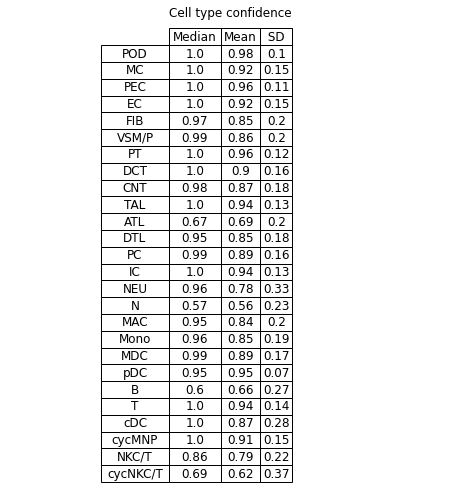

In [28]:
fig, ax = plt.subplots(figsize=(8, len(Prob_table_rounded) / 3))


ax.axis('off')


table = ax.table(
    cellText=Prob_table_rounded.values,
    colLabels=['Median', 'Mean', ' SD '],  # Simplify column labels
    rowLabels=Prob_table_rounded.index,
    loc='center'
)

table.auto_set_font_size(False)
table.set_fontsize(12)  
table.auto_set_column_width(col=list(range(len(Prob_table_rounded.columns) + 1))) 
table.scale(1.4, 1.4)  

for (row, col), cell in table.get_celld().items():
    cell.set_text_props(ha='center')  # Center-align cells
    if row == 0:  # Header row
        cell.set_text_props(fontsize=12)  # Bold header
        #cell.set_facecolor("#f0f0f0")  
    if col == -1:  
        cell.set_text_props()  


plt.title("Cell type confidence", fontsize=12, weight='normal', pad=0)

plt.savefig("./output/NucSeq_CellType_assignment.pdf", bbox_inches='tight')
plt.show()


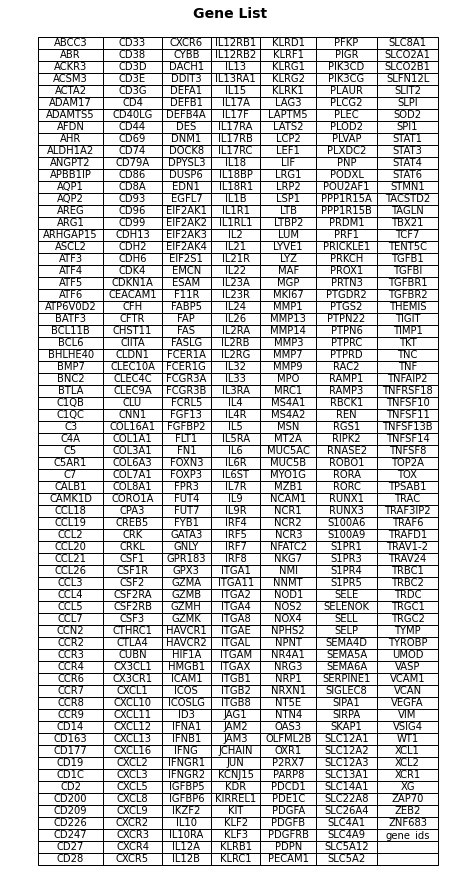

In [29]:
file_path = "/data/projects/zeba/MY_PROJECTS/240130_Xenium_ANCA_SLE_GBM/xenium-cgn/notebooks_zs/COMMON_GIT_FOLDER/gene_panel.csv"
gene_list = pd.read_csv(file_path, header=None, names=["Gene"])
gene_list = gene_list["Gene"].sort_values().tolist()

num_columns = 7
num_rows = int(np.ceil(len(gene_list) / num_columns))
columns = [gene_list[i * num_rows: (i + 1) * num_rows] for i in range(num_columns)]

max_rows = max(len(col) for col in columns)
columns = [col + [""] * (max_rows - len(col)) for col in columns]

table_data = pd.DataFrame(columns).transpose()

fig, ax = plt.subplots(figsize=(8.27, 11.69))
ax.axis('off')

table = ax.table(
    cellText=table_data.values,
    loc='center',
    cellLoc='center'
)

table.auto_set_font_size(False)
table.set_fontsize(10)
table.auto_set_column_width(col=list(range(num_columns)))

fig.suptitle("Gene List", fontsize=14, weight='bold', y=1.03)

plt.savefig("./output/Gene_Panel_Xenium.pdf", bbox_inches='tight')
plt.show()
